In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import time

In [7]:
## Import dataset
train = pd.read_excel("/home/rupeek/Desktop/ML &AI/capstone/Online Retail.xlsx")

In [8]:
train.shape

(541909, 8)

In [9]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
## check for duplicate items
train.duplicated().sum()

5268

In [11]:
## remove duplicated items
train = train[~train.duplicated()]

In [12]:
train.duplicated().sum()

0

In [13]:
## check for missing values
train.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
train = train[~train.isnull()]

In [15]:
## create a list of unique InvoiceNo with null CustomerID records
Invoice_list = train[train['CustomerID'].isnull()]['InvoiceNo'].tolist()

Invoice_list

[536414,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 536544,
 

In [16]:
## Check number of records with these invoice number
len(train[train.InvoiceNo.isin(Invoice_list)])

135037

In [17]:
## Removing records with null customer IDs
rfm_train = train[train['CustomerID'].notnull()].copy()

In [18]:
rfm_train.shape

(401604, 8)

In [19]:
rfm_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 103.0 MB


In [20]:
rfm_train['CustomerID'] = rfm_train['CustomerID'].astype(int)

In [21]:
rfm_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 103.0 MB


In [22]:
rfm_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Check for cancelled items**


In [23]:
desc_df = rfm_train[~rfm_train['InvoiceNo'].str.contains('C', na=False)]

In [24]:
## Lets create total cost feature
desc_df['Total_cost'] = rfm_train['Quantity'] * rfm_train['UnitPrice']
desc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### EDA

In [25]:
#unique stock items
desc_df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [26]:
print(f'Oldest date is - {desc_df.InvoiceDate.min()}\n')
print(f'Latest date is - {desc_df.InvoiceDate.max()}')

Oldest date is - 2010-12-01 08:26:00

Latest date is - 2011-12-09 12:50:00


In [27]:
# Check the top ten countries in the dataset with highest transactions
desc_df.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

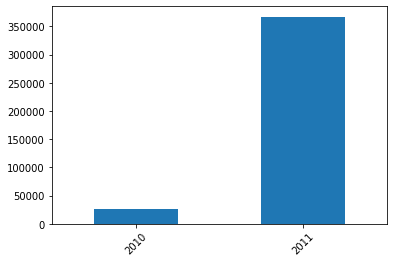

In [28]:
# Count of transactions in different years
desc_df.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45);

In [29]:
desc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00
Total_cost,392732.0,22.629195,311.083465,0.0,4.95,12.39,19.80,168469.60


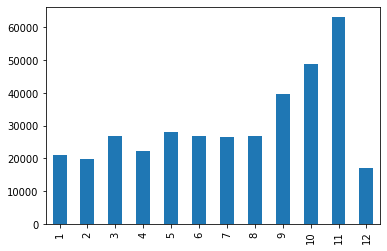

In [30]:
# Count of transactions in different months within 2011 year.
desc_df[desc_df.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar');

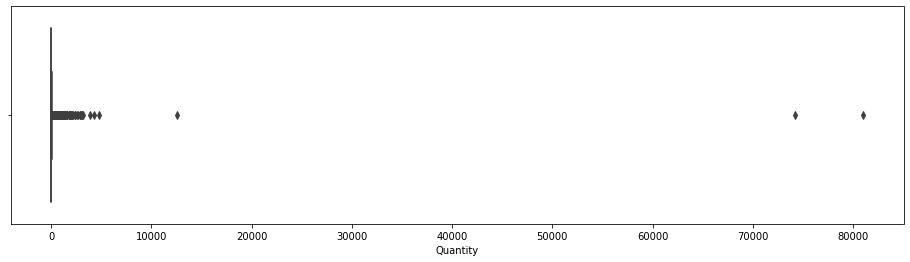

In [31]:
# Boxplot to visualize the Quantity distribution
plt.figure(figsize=(16,4))
sns.boxplot(y='Quantity', data=desc_df, orient='h');

### Recency

In [32]:
current_date = rfm_train['InvoiceDate'].max().date()

In [33]:
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date

In [34]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [35]:
recency

,CustomerID,Purchase_Date
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02
...,...,...
4367,18280,2011-03-07
4368,18281,2011-06-12
4369,18282,2011-12-02
4370,18283,2011-12-06


In [36]:
recency['Current_Date'] = current_date
recency

,CustomerID,Purchase_Date,Current_Date
0,12346,2011-01-18,2011-12-09
1,12347,2011-12-07,2011-12-09
2,12348,2011-09-25,2011-12-09
3,12349,2011-11-21,2011-12-09
4,12350,2011-02-02,2011-12-09
...,...,...,...
4367,18280,2011-03-07,2011-12-09
4368,18281,2011-06-12,2011-12-09
4369,18282,2011-12-02,2011-12-09
4370,18283,2011-12-06,2011-12-09


In [37]:
## Compute the number of days since last purchase
recency['Recency'] = recency['Purchase_Date'].apply(lambda x: (current_date - x).days)
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346,2011-01-18,2011-12-09,325
1,12347,2011-12-07,2011-12-09,2
2,12348,2011-09-25,2011-12-09,75
3,12349,2011-11-21,2011-12-09,18
4,12350,2011-02-02,2011-12-09,310


In [38]:
recency.drop(['Purchase_Date', 'Current_Date'], axis=1, inplace=True)

### Frequency 

In [39]:
frequency = rfm_train.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo': 'Frequency'})
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


### Monetary 

In [40]:
rfm_train['Total_cost'] = rfm_train['Quantity'] * rfm_train['UnitPrice']

In [41]:
monetary = rfm_train.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost': 'Monetary'})
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [42]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')
rfm_table.set_index('CustomerID', inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [43]:
rfm_table.reset_index().to_csv('/home/rupeek/Desktop/ML &AI/capstone/Retail RFM.csv',index=False)

In [44]:
rfm_csv = pd.read_csv('/home/rupeek/Desktop/ML &AI/capstone/Retail RFM.csv')
rfm_csv.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,18,1,1757.55
4,12350,310,1,334.40


### RFM Table integrity check

In [45]:
rfm_train[rfm_train['CustomerID'] == rfm_table.index[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_Date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,-77183.6


In [46]:
# Check if the number difference of days from the purchase date in original record is same as shown in rfm table.
(current_date - rfm_train[rfm_train.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

True

### Customer Segments with RFM Model

In [47]:
## RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.0,1.0,291.795
0.50,50.0,3.0,644.070
0.75,143.0,5.0,1608.335


In [48]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0700000000002,
  0.75: 1608.335}}

### Creation of RFM Segments

In [49]:
def RScore(x, p, d):
    '''
    Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict) 
    '''
    if x <= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [50]:
def FMScore(x,p,d):
    '''
    Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
    '''
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [51]:
rfm_segment = rfm_table.copy()

In [52]:
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [53]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346,325,2,0.00,1,2,1
12347,2,7,4310.00,4,4,4
12348,75,4,1797.24,2,3,4
12349,18,1,1757.55,3,1,4
12350,310,1,334.40,1,1,2


In [54]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,325,2,0.00,1,2,1,121
12347,2,7,4310.00,4,4,4,444
12348,75,4,1797.24,2,3,4,234
12349,18,1,1757.55,3,1,4,314
12350,310,1,334.40,1,1,2,112


> Best Recency score = 4 (most recently purchase)

> Best Frequency score = 4 (most frequently purchase)

> Best Monetary score = 4 (who spent the most)

In [55]:
rfm_segment.reset_index(inplace=True)

In [56]:
rfm_segment.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346,325,2,0.00,1,2,1,121
1,12347,2,7,4310.00,4,4,4,444
2,12348,75,4,1797.24,2,3,4,234
3,12349,18,1,1757.55,3,1,4,314
4,12350,310,1,334.40,1,1,2,112


In [57]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [58]:
dict_segment = dict(zip(segment_dict.values(), segment_dict.keys()))

In [59]:
dict_segment

{'444': 'Best Customers',
 '344': 'Loyal Customers',
 '334': 'Big Spenders',
 '244': 'Almost Lost',
 '144': 'Lost Customers',
 '443': 'Recent Customers',
 '122': 'Lost Cheap Customers'}

In [60]:
# Allocate segments to each customer as per the RFM score mapping
rfm_segment['Segment'] = rfm_segment.RFMScore.map(lambda x: dict_segment.get(x))

In [61]:
# Allocate all remaining customers to others segment category
rfm_segment.Segment.fillna('others', inplace=True)

In [62]:
rfm_segment.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2213,15341,80,1,2020.52,2,1,4,214,others
2084,15167,320,1,158.80,1,1,1,111,others
2571,15813,207,2,1303.91,1,2,3,123,others
544,13052,212,1,348.15,1,1,2,112,others
3076,16504,25,1,465.88,3,1,2,312,others
1837,14830,53,1,188.88,2,1,1,211,others
1006,13695,31,15,2504.13,3,4,4,344,Loyal Customers
466,12942,131,3,675.60,2,2,3,223,others
51,12410,301,3,681.08,1,2,3,123,others
1253,14034,22,4,509.09,3,3,2,332,others


**How to Implement RFM Analysis Used in Customer Segmentation
RFM analysis helps marketers find answers to the following questions:

**
- Who are my best customers?
- Which customers are at the verge of churning?
- Who has the potential to become valuable customers?
- Which of your customers can be retained?
- Which of your customers are most likely to respond to engagement campaigns?

- Who are lost customers that you don’t need to pay much attention to?
- Who are your loyal customers?


In [63]:
# Best Customers who's recency, frequency as well as monetary attribute is highest.
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1703,14646,1,77,279489.02,4,4,4,444,Best Customers
4233,18102,0,62,256438.49,4,4,4,444,Best Customers
3758,17450,8,55,187322.17,4,4,4,444,Best Customers
1895,14911,1,248,132458.73,4,4,4,444,Best Customers
1345,14156,9,66,113214.59,4,4,4,444,Best Customers


In [64]:
# customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,86,18,7157.10,2,4,4,244,Almost Lost


In [65]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2794,16126,29,4,6287.77,3,3,4,334,Big Spenders
737,13316,37,5,5570.69,3,3,4,334,Big Spenders
2923,16303,25,4,5305.83,3,3,4,334,Big Spenders
2897,16258,45,5,5203.51,3,3,4,334,Big Spenders
70,12432,42,5,5059.32,3,3,4,334,Big Spenders


In [66]:
# Almost Lost i.e. who's recency value is low
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,86,18,7157.10,2,4,4,244,Almost Lost


In [67]:
# Lost customers that don't needs attention who's recency, frequency as well as monetary values are low
rfm_segment[rfm_segment.RFMScore=='122'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1578,14481,164,2,636.51,1,2,2,122,Lost Cheap Customers
2246,15384,169,3,635.76,1,2,2,122,Lost Cheap Customers
1230,14000,206,2,633.71,1,2,2,122,Lost Cheap Customers
1985,15045,151,3,633.66,1,2,2,122,Lost Cheap Customers
1391,14220,247,2,632.40,1,2,2,122,Lost Cheap Customers


In [68]:
# loyal customers who's purchase frequency is high
rfm_segment[rfm_segment.RFMScore=='344'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
55,12415,24,26,123725.45,3,4,4,344,Loyal Customers
2722,16029,38,76,53168.69,3,4,4,344,Loyal Customers
3014,16422,17,75,33805.69,3,4,4,344,Loyal Customers
458,12931,21,20,33462.81,3,4,4,344,Loyal Customers
1728,14680,25,23,26932.34,3,4,4,344,Loyal Customers


### KMeans Clustering

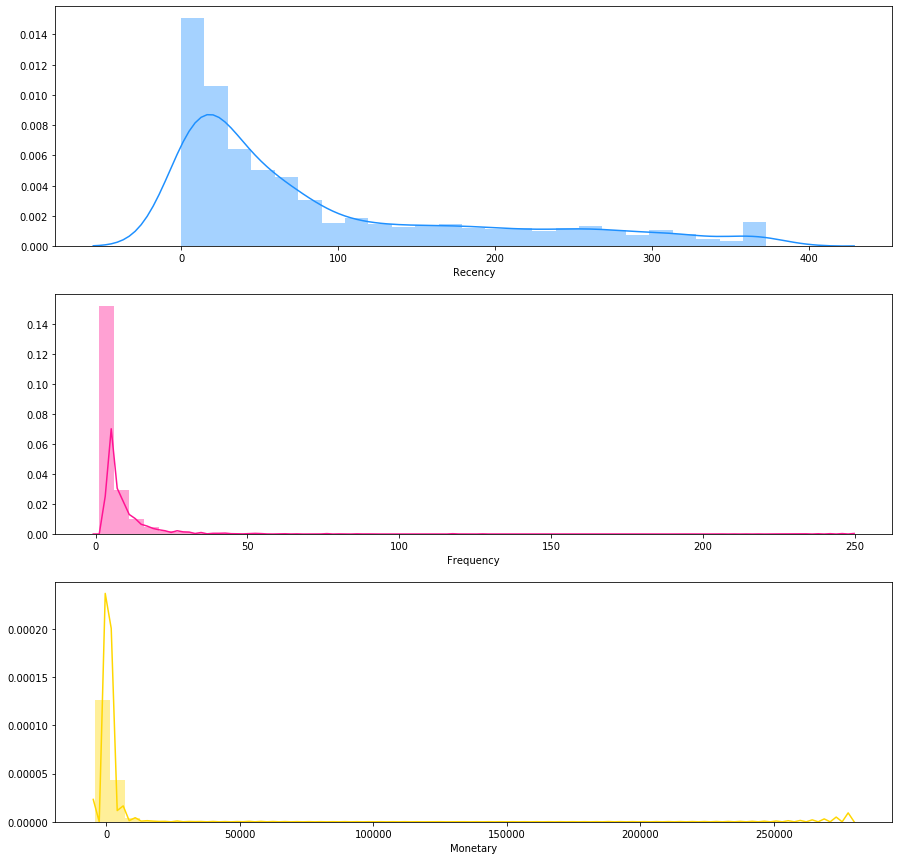

In [69]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

In [70]:
rfm_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.0,91.581199,100.772139,0.00,16.000,50.00,143.000,373.00
Frequency,4372.0,5.075480,9.338754,1.00,1.000,3.00,5.000,248.00
Monetary,4372.0,1893.531433,8218.696204,-4287.63,291.795,644.07,1608.335,279489.02


In [71]:
rfm_table_scaled = rfm_table.copy()

In [72]:
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1

In [73]:
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

In [74]:
rfm_table_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.0,92.581199,100.772139,1.0,17.000,51.0,144.000,374.00
Frequency,4372.0,5.075480,9.338754,1.0,1.000,3.0,5.000,248.00
Monetary,4372.0,6182.161433,8218.696204,1.0,4580.425,4932.7,5896.965,283777.65


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
log_df = np.log(rfm_table_scaled)

In [77]:
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

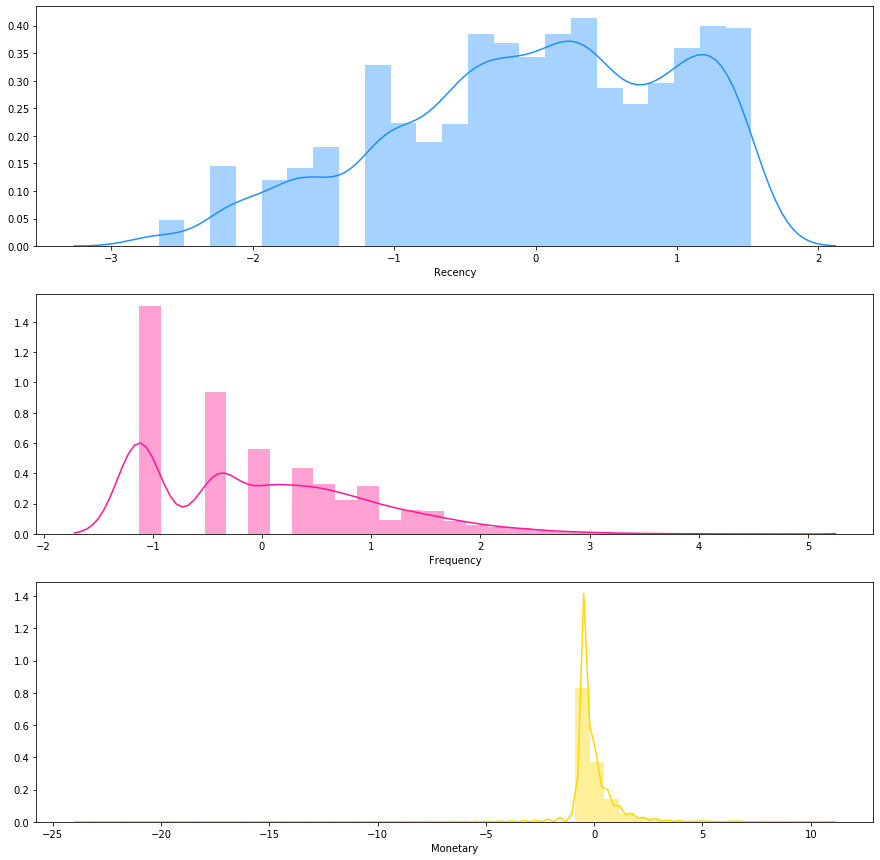

In [78]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

In [79]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

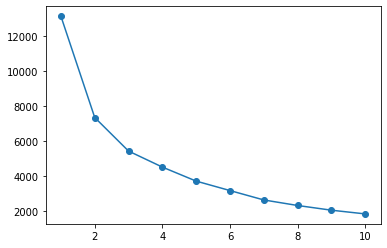

In [80]:
# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

Silhouette score for number of cluster(s) 2: 0.4405297656150766
Silhouette score for number of cluster(s) 3: 0.3967504690109654
Silhouette score for number of cluster(s) 4: 0.35046863106007997
Silhouette score for number of cluster(s) 5: 0.36166861264035577
Silhouette score for number of cluster(s) 6: 0.36486216225288387
Silhouette score for number of cluster(s) 7: 0.35445191505198254
Silhouette score for number of cluster(s) 8: 0.33932511699064893
Silhouette score for number of cluster(s) 9: 0.3436531967884225
Silhouette score for number of cluster(s) 10: 0.35333869474160057
Silhouette score for number of cluster(s) 11: 0.3607881642107286


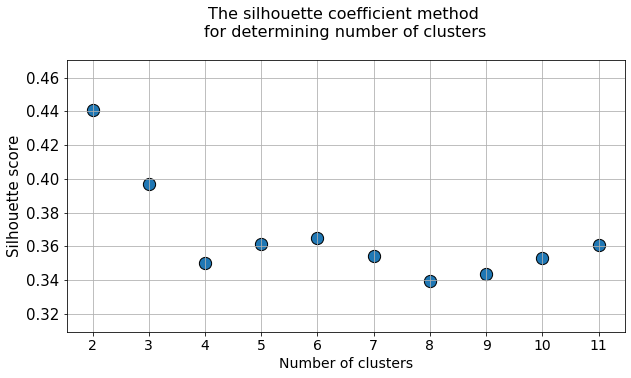

In [81]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

#### Here we can clearly see that optimum number of cluster should be 4 not 2 or 3. Because that is the only point after which the mean cluster distance looks to be plateaued after a steep downfall. So we will assume the 4 number of clusters as best for grouping of customer segments.

#### Now let's apply K-Means on 4 clusters to segregate the customer base.

In [82]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [83]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [84]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4372,)
Shape of RFM segment dataframe is (4372, 9)


In [85]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [86]:
Cluster_table.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2140,15241,66,9,1738.59,2,4,4,244,Almost Lost,0
1992,15052,319,1,207.73,1,1,1,111,others,2
4184,18034,21,2,418.68,3,2,2,322,others,0
2290,15443,1,8,3188.84,4,4,4,444,Best Customers,1
440,12908,58,4,246.00,2,3,1,231,others,0
468,12944,35,2,604.51,3,2,2,322,others,0
1092,13812,42,3,539.00,3,2,2,322,others,0
1153,13890,1,14,1860.86,4,4,4,444,Best Customers,1
3818,17530,1,10,2367.12,4,4,4,444,Best Customers,1
3938,17693,136,3,187.02,2,2,1,221,others,2


In [87]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
4238,18109,1,31,7877.27,4,4,4,444,Best Customers,3
4023,17811,4,51,7601.80,4,4,4,444,Best Customers,3
2329,15498,0,35,12396.46,4,4,4,444,Best Customers,3
436,12901,8,36,16293.10,4,4,4,444,Best Customers,3
487,12971,3,89,10930.26,4,4,4,444,Best Customers,3


In [88]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
840,13464,58,1,674.68,2,1,3,213,others,2
2238,15372,137,1,2007.40,2,1,4,214,others,2
4096,17908,373,1,232.03,1,1,1,111,others,2
1987,15047,269,1,343.62,1,1,2,112,others,2
3683,17354,50,1,1393.06,3,1,3,313,others,2


In [89]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2754,16076,3,11,2173.53,4,4,4,444,Best Customers,1
3358,16891,1,5,742.43,4,3,3,433,others,1
2464,15671,18,10,2635.49,3,4,4,344,Loyal Customers,1
3983,17750,5,9,1710.45,4,4,4,444,Best Customers,1
517,13014,2,16,3365.43,4,4,4,444,Best Customers,1


In [90]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2369,15549,77,4,1643.96,2,3,4,234,others,0
1605,14513,100,4,438.49,2,3,2,232,others,0
610,13142,19,1,307.09,3,1,2,312,others,0
3618,17254,4,2,271.19,4,2,1,421,others,0
4356,18263,23,4,1211.08,3,3,3,333,others,0


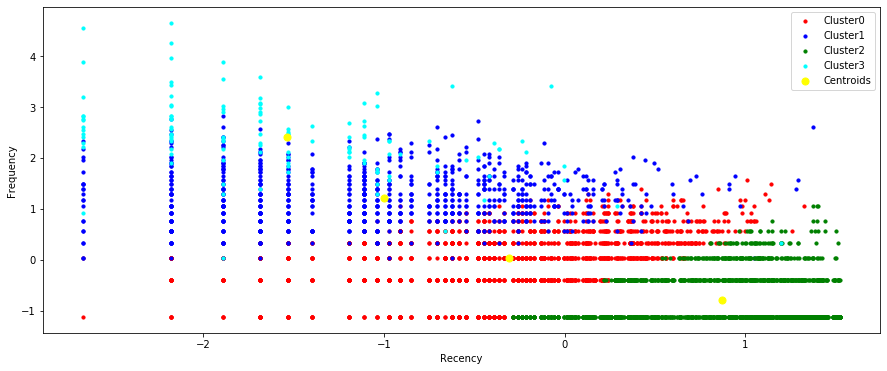

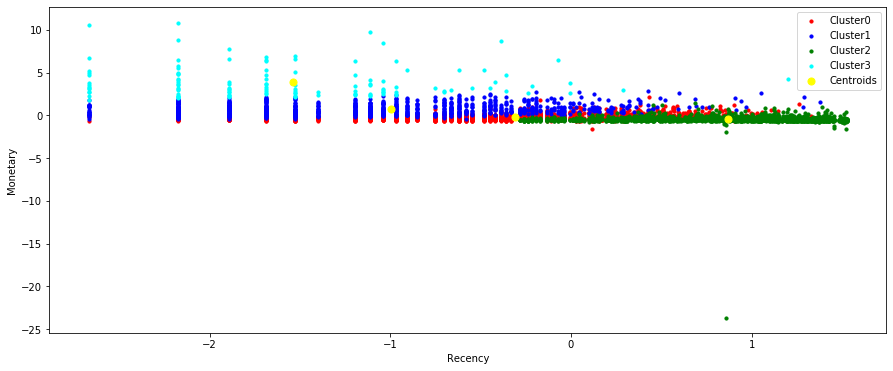

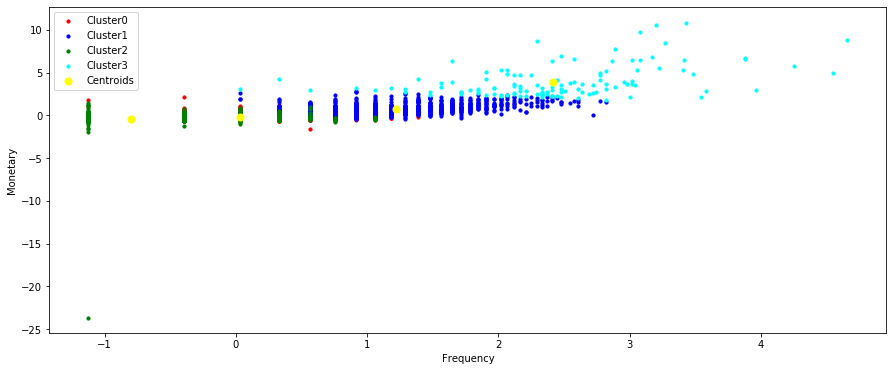

In [91]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'yellow', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();

In [92]:
# Assign Cluster values to each customer in normalized dataframe
normal_df = normal_df.assign(Cluster = cluster_labels)

# Melt normalized dataframe into long form to have all metric in same column
normal_melt = pd.melt(normal_df.reset_index(),
                      id_vars=['CustomerID','Cluster'],
                      value_vars=['Recency', 'Frequency', 'Monetary'],
                      var_name='Metric',
                      value_name='Value')
normal_melt.head()

,CustomerID,Cluster,Metric,Value
0,12346,2,Recency,1.428946
1,12347,1,Recency,-1.889472
2,12348,0,Recency,0.398257
3,12349,0,Recency,-0.582976
4,12350,2,Recency,1.395605


In [93]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)

# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean() 

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by 
relative_imp = cluster_avg / population_avg - 1

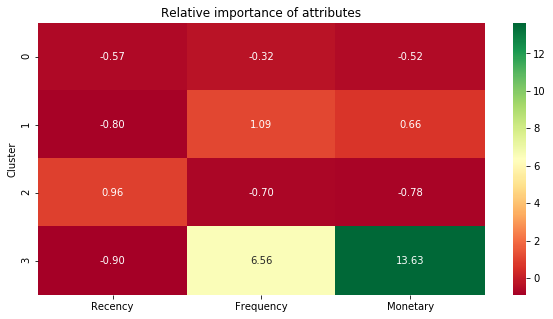

In [94]:
plt.figure(figsize=(10, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show();